In [5]:
% matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def savefig(*args, **kwargs):
    kwargs.update({
        'transparent': True
    })
    plt.savefig(*args, **kwargs)

In [99]:
G = nx.Graph()
G.add_edges_from([
        ('Alice', 'Betty'),
        ('Alice', 'Carol'),
        ('Betty', 'David'),
        ('Betty', 'Erick'),
        ('Carol', 'Betty'),
    ])
pos = nx.spring_layout(G)

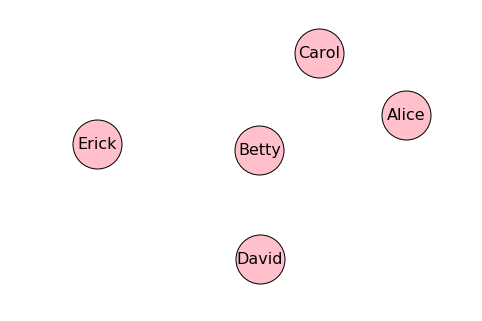

In [100]:
nx.draw(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
        node_color='pink',
        width=0,
       )
savefig('simple_network_nodesonly.svg')

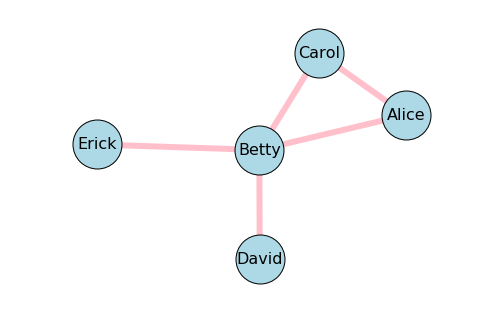

In [101]:
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', node_size=2400, font_size=16, width=6,
        edge_color='pink',
       )
savefig('simple_network_edges.svg')

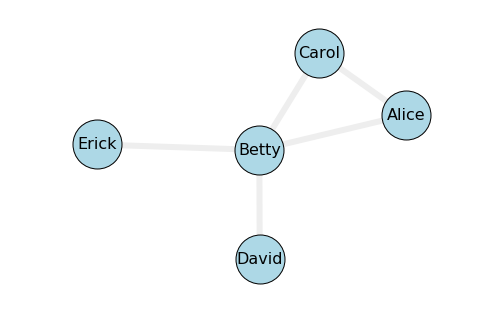

In [102]:
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', node_size=2400, font_size=16, width=6, edge_color='#EEEEEE')
savefig('simple_network.svg')

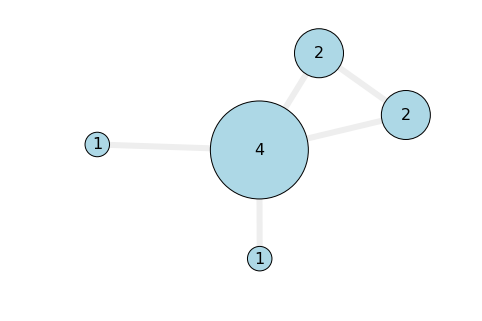

In [103]:
node_labels = {n:G.degree(n) for n in G}
node_sizes = [600 * G.degree(n) ** 2 for n in G.nodes_iter()]
nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', font_size=16, width=6, edge_color='#EEEEEE',
       labels=node_labels, node_size=node_sizes)
savefig('simple_network_degree.svg')


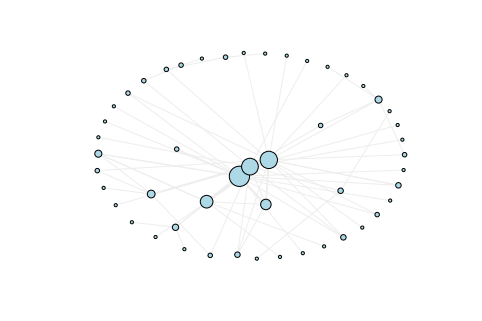

In [104]:
S = nx.scale_free_graph(50)
node_sizes = [10 * S.degree(n) for n in S.nodes_iter()]
nx.draw(S, node_color='lightblue', edge_color='#EEEEEE', node_size=node_sizes, arrows=False)
savefig('scale_free.svg')

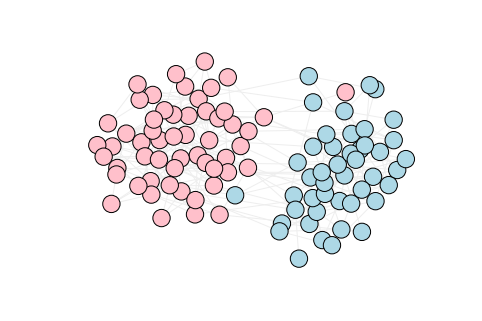

In [78]:
import random
C = nx.erdos_renyi_graph(100, 0.1)
for n in C:
    C.node[n]['color'] = random.choice(['lightblue', 'pink'])
node_colors = [C.node[n]['color'] for n in C.nodes_iter()]
for n1, n2 in C.edges():
    if C.node[n1]['color'] != C.node[n2]['color'] and random.random() < 0.9:
        C.remove_edge(n1, n2)
nx.draw(C, node_color=node_colors, edge_color='#EEEEEE')
savefig('polarization.svg')

In [38]:
import random
import itertools

def random_cluster_network(N, colors, p_in, p_out):
    C2 = nx.Graph()
    C2.add_nodes_from(range(N))

    for idx, n in enumerate(C2.nodes_iter()):
        cluster = idx % N_clusters
        # C2.node[n]['cluster'] = cluster
        C2.node[n]['color'] = random.choice(colors)

    for u, v in itertools.combinations(C2.nodes(), 2):
        p = p_in if C2.node[u]['color'] == C2.node[v]['color'] else p_out
        if random.random() < p:
            C2.add_edge(u, v)
    
    return C2

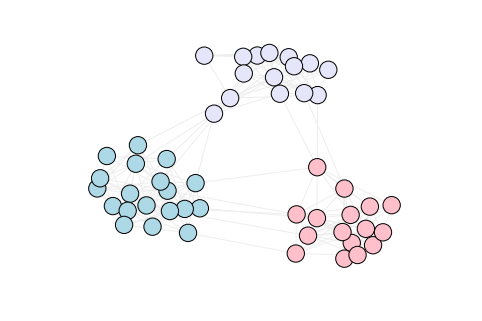

In [37]:
C2 = random_cluster_network(50, ['lightblue', 'pink', 'lavender'], 0.5, 0.015)

node_colors = [C2.node[n]['color'] for n in C2.nodes_iter()]
nx.draw(C2, node_color=node_colors, edge_color='#EEEEEE')
savefig('communities.svg')

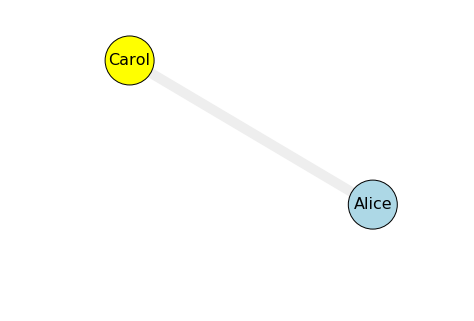

In [108]:
dyad = nx.Graph()
dyad.add_edge('Alice','Carol')
node_colors = ['yellow' if n == 'Carol' else 'lightblue' for n in dyad.nodes_iter()]
nx.draw(dyad, pos=pos, node_color=node_colors, with_labels=True, node_size=2400, font_size=16, width=10, edge_color='#EEEEEE')
savefig('dyad_si.svg')

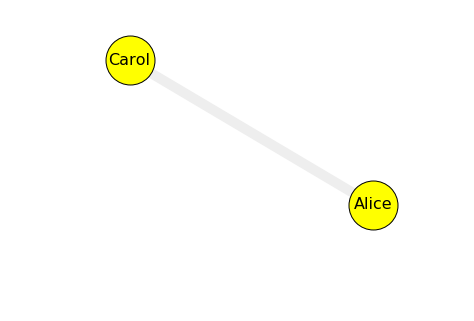

In [109]:
nx.draw(dyad, pos=pos ,node_color='yellow', with_labels=True, node_size=2400, font_size=16, width=10, edge_color='#EEEEEE')
savefig('dyad_ii.svg')

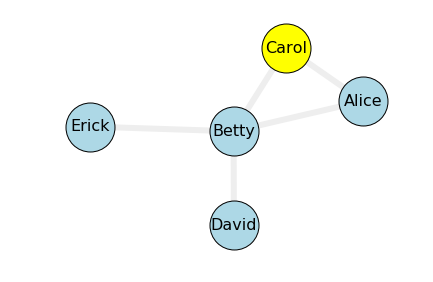

In [149]:
infected = {'Carol'}
infection = {}
plt.axis('off')

nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=infected,
                       node_color='yellow')
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=set(G.nodes()).difference(infected),
                       node_color='lightblue')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edge_color='#EEEEEE')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edgelist=infection,
                      edge_color='red')

nx.draw_networkx_labels(G,pos,font_size=16)
savefig('simple_network_si_1.svg')

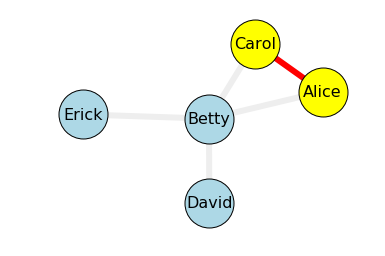

In [146]:
infected = {'Carol', 'Alice'}
infection = {('Carol', 'Alice')}
plt.axis('off')

nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=infected,
                       node_color='yellow')
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=set(G.nodes()).difference(infected),
                       node_color='lightblue')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edge_color='#EEEEEE')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edgelist=infection,
                      edge_color='red')

nx.draw_networkx_labels(G,pos,font_size=16)
savefig('simple_network_si_2.svg')


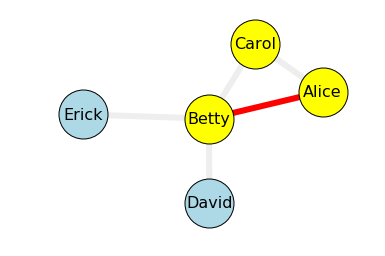

In [147]:
infected = {'Carol', 'Alice', 'Betty'}
infection = {('Betty', 'Alice')}
plt.axis('off')

nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=infected,
                       node_color='yellow')
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       nodelist=set(G.nodes()).difference(infected),
                       node_color='lightblue')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edge_color='#EEEEEE')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edgelist=infection,
                      edge_color='red')

nx.draw_networkx_labels(G,pos,font_size=16)
savefig('simple_network_si_3.svg')

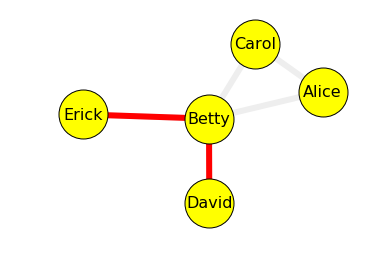

In [148]:
infection = {('Betty', 'David'), ('Betty', 'Erick')}
plt.axis('off')

nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=2400, font_size=16,
                       node_color='yellow')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edge_color='#EEEEEE')
nx.draw_networkx_edges(G, pos=pos, width=6,
                      edgelist=infection,
                      edge_color='red')

nx.draw_networkx_labels(G,pos,font_size=16)
savefig('simple_network_si_4.svg')

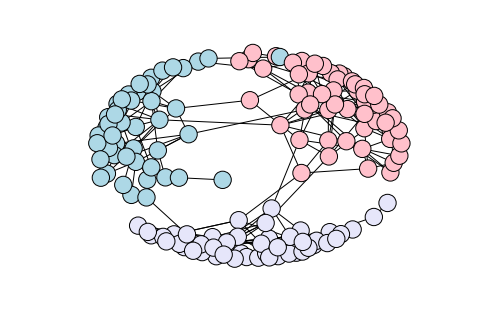

In [75]:
C3 = random_cluster_network(150, ['lightblue', 'pink', 'lavender'], 0.08, 0.001)
C3 = next(nx.connected_component_subgraphs(C3))
nx.draw(C3, node_color=[C3.node[n]['color'] for n in C3.nodes_iter()])

In [76]:
C3.number_of_edges()

318

In [58]:
import json
from networkx.readwrite import json_graph

data = json_graph.node_link_data(C3)
data['nodes'] = [{'name': n} for n in C3]
json.dump(data, open('communities.json', 'w'))
# probs 0.2 and 0.15 are interesting for this graph